                                                                                                       Sabtu, 3-12-2022
## Kelompok 4
1. Ardyn Rezky Fahreza (2103551)
2. Muhammad Fikri Kafilli (2107264)
3. Bayu Wicaksono (2106836)
4. Muhammad Fadlan Ghafur (2106923)
5. Talitha Syahla (2101330)

### Scenario
Memprediksi apakah setelah membeli customer akan mengembalikan barang (di Eropa ada perlindungan konsumen yang membuat konsumen dapat mengembalikan barang tanpa alasan asal dalam periode tertentu). Pengembalian barang yang berlebih dapat merugikan pemilik toko.
### Task
Terdapat 481000 data transaksi yang dapat digunakan untuk membuat model. Atribut target (yang akan diprediksi) adalah "returnShipment" (atribut terakhir) yang bernilai 0 jika item disimpan pembeli dan bernilai 1 jika item dikembalikan.

## Praproses dan EDA Data Training

### Import Library

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date

### Read Files

In [6]:
df_train = pd.read_table("C://Users//Byebay//Documents//College//Data Mining//tugas//klasifikasi//dataset//orders_train.txt", delimiter=";", na_values = '?')
df_train.head(2)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,2012-04-01,2012-04-03,186,m,denim,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0
1,2,2012-04-01,2012-04-03,71,9+,ocher,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     481092 non-null  int64  
 1   orderDate       481092 non-null  object 
 2   deliveryDate    441673 non-null  object 
 3   itemID          481092 non-null  int64  
 4   size            481092 non-null  object 
 5   color           480949 non-null  object 
 6   manufacturerID  481092 non-null  int64  
 7   price           481092 non-null  float64
 8   customerID      481092 non-null  int64  
 9   salutation      481092 non-null  object 
 10  dateOfBirth     432203 non-null  object 
 11  state           481092 non-null  object 
 12  creationDate    481092 non-null  object 
 13  returnShipment  481092 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


### Melihat data NULL pada tiap atribut

In [8]:
df_train.isna().sum()

orderItemID           0
orderDate             0
deliveryDate      39419
itemID                0
size                  0
color               143
manufacturerID        0
price                 0
customerID            0
salutation            0
dateOfBirth       48889
state                 0
creationDate          0
returnShipment        0
dtype: int64

### Menghapus data yang tidak masuk akal pada atribut dateOfBirth

In [9]:
df_train[df_train['dateOfBirth'] == "1655-04-19"]

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
201497,201498,2012-09-12,2012-09-13,1662,l,brown,36,109.9,48469,Mrs,1655-04-19,Bavaria,2011-02-16,1
223802,223803,2012-09-22,2012-09-24,1662,m,brown,36,109.9,48469,Mrs,1655-04-19,Bavaria,2011-02-16,1
322553,322554,2013-01-08,2013-01-31,2429,M,black,11,89.9,48469,Mrs,1655-04-19,Bavaria,2011-02-16,0


In [10]:
df_train.drop(df_train[df_train['dateOfBirth'] == "1655-04-19"].index, inplace = True)

### Mengubah datatype orderdate, deliverydate, dateofBirth, creationDate dari object menjadi datetime

In [11]:
df_train['orderDate'] = pd.to_datetime(df_train['orderDate'], format="%Y-%m-%d")
df_train['creationDate'] = pd.to_datetime(df_train['creationDate'], format="%Y-%m-%d")
df_train['deliveryDate'] = pd.to_datetime(df_train['deliveryDate'], format="%Y-%m-%d", errors='coerce')
df_train['dateOfBirth'] = pd.to_datetime(df_train['dateOfBirth'], format="%Y-%m-%d", errors='coerce')

### Melihat jumlah setiap value pada atribut returnShipment

In [12]:
df_train.returnShipment.value_counts(dropna=False)

0    249000
1    232089
Name: returnShipment, dtype: int64

### Melihat jumlah setiap value pada atribut Salutation

In [13]:
df_train.salutation.value_counts()

Mrs             461766
Mr               16720
Family            1891
Company            361
not reported       351
Name: salutation, dtype: int64

### Melihat jumlah setiap value pada atribut Size

In [14]:
df_train['size'].value_counts().head(10)

l          37288
xl         34972
40         34118
m          32336
39         29318
L          28445
xxl        27247
unsized    26039
XL         25155
38         24780
Name: size, dtype: int64

### Melihat jumlah setiap value pada atribut Color

In [15]:
color = df_train['color'].value_counts()
color[59:70]

dark oliv         149
baltic blue       147
gold               98
kanel              78
cobalt blue        76
dark garnet        74
brwon              67
dark grey          65
almond             59
antique pink       35
currant purple     34
Name: color, dtype: int64

In [16]:
# apakah brwn adalah sebuah warna ?
df_train[df_train['color'] == 'brwon'].head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
1037,1038,2012-04-01,2012-04-05,20,42,brwon,15,54.95,1571,Mrs,1966-07-25,Lower Saxony,2011-06-06,0
1766,1767,2012-04-02,2012-05-07,653,38,brwon,15,54.95,1883,Mrs,NaT,Lower Saxony,2012-02-28,1
7136,7137,2012-04-07,NaT,913,8+,brwon,48,89.90,4201,Mrs,1953-04-02,North Rhine-Westphalia,2012-03-25,0
8351,8352,2012-04-09,2012-04-27,617,43,brwon,15,54.95,4671,Mrs,1972-08-04,Bavaria,2012-04-08,0
13696,13697,2012-04-10,2012-05-07,653,39,brwon,15,54.95,6517,Mrs,NaT,Bavaria,2012-04-10,0


In [17]:
# blau adalah bahasa jerman dari blue
df_train[df_train['color'] == 'blau'].head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
320,321,2012-04-01,2012-04-04,32,l,blau,3,24.9,1191,Mrs,1963-06-21,Lower Saxony,2012-03-31,1
573,574,2012-04-01,2012-04-26,32,xl,blau,3,24.9,1317,Mrs,1900-11-19,Bavaria,2011-11-03,0
905,906,2012-04-01,2012-04-04,32,m,blau,3,21.9,1507,Mrs,1957-12-14,North Rhine-Westphalia,2011-02-16,1
1017,1018,2012-04-03,2012-04-04,32,xxl,blau,3,24.9,1563,Mrs,1955-02-12,Hamburg,2012-03-28,0
1394,1395,2012-04-01,2012-04-06,32,l,blau,3,21.9,1748,Mrs,1968-02-06,Saxony,2012-04-01,0


### Mengubah data blau dan brwon pada atribut color

In [18]:
df_train.color = np.where(df_train.color == 'brwon', 'brown', df_train.color)
df_train.color = np.where(df_train.color == 'blau', 'blue', df_train.color)

### Mengelompokkan atribut color menjadi warna dasar 

In [19]:
df_train['color'] = df_train['color'].replace(['amethyst'], 'purple')
df_train['color'] = df_train['color'].replace(['almond'], 'brown')
df_train['color'] = df_train['color'].replace(['ancient'], 'brown')
df_train['color'] = df_train['color'].replace(['anthracite'], 'grey')
df_train['color'] = df_train['color'].replace(['antique pink'], 'pink')
df_train['color'] = df_train['color'].replace(['apricot'], 'orange')
df_train['color'] = df_train['color'].replace(['aqua'], 'blue')
df_train['color'] = df_train['color'].replace(['aquamarine'], 'blue')
df_train['color'] = df_train['color'].replace(['ash'], 'grey')
df_train['color'] = df_train['color'].replace(['aubergine'], 'purple')
df_train['color'] = df_train['color'].replace(['aviator'], 'grey')
df_train['color'] = df_train['color'].replace(['avocado'], 'green')
df_train['color'] = df_train['color'].replace(['azure'], 'blue')
df_train['color'] = df_train['color'].replace(['baltic blue'], 'blue')
df_train['color'] = df_train['color'].replace(['basalt'], 'grey')
df_train['color'] = df_train['color'].replace(['beige'], 'yellow')
df_train['color'] = df_train['color'].replace(['berry'], 'red')
df_train['color'] = df_train['color'].replace(['bordeaux'], 'red')
df_train['color'] = df_train['color'].replace(['caramel'], 'brown')
df_train['color'] = df_train['color'].replace(['bronze'], 'brown')
df_train['color'] = df_train['color'].replace(['champagner'], 'yellow')
df_train['color'] = df_train['color'].replace(['cognac'], 'red')
df_train['color'] = df_train['color'].replace(['copper coin'], 'brown')
df_train['color'] = df_train['color'].replace(['coral'], 'orange')
df_train['color'] = df_train['color'].replace(['cortina mocca'], 'brown')
df_train['color'] = df_train['color'].replace(['creme'], 'brown')
df_train['color'] = df_train['color'].replace(['crimson'], 'red')
df_train['color'] = df_train['color'].replace(['curled'], 'brown')
df_train['color'] = df_train['color'].replace(['currant purple'], 'purple')
df_train['color'] = df_train['color'].replace(['curry'], 'yellow')
df_train['color'] = df_train['color'].replace(['dark denim'], 'blue')
df_train['color'] = df_train['color'].replace(['dark garnet'], 'purple')
df_train['color'] = df_train['color'].replace(['dark grey'], 'grey')
df_train['color'] = df_train['color'].replace(['dark navy'], 'blue')
df_train['color'] = df_train['color'].replace(['dark oliv'], 'green')
df_train['color'] = df_train['color'].replace(['darkblue'], 'blue')
df_train['color'] = df_train['color'].replace(['denim'], 'blue')
df_train['color'] = df_train['color'].replace(['ebony'], 'brown')
df_train['color'] = df_train['color'].replace(['ecru'], 'brown')
df_train['color'] = df_train['color'].replace(['floral'], 'red')
df_train['color'] = df_train['color'].replace(['fuchsia'], 'purple')
df_train['color'] = df_train['color'].replace(['gold'], 'yellow')
df_train['color'] = df_train['color'].replace(['graphite'], 'grey')
df_train['color'] = df_train['color'].replace(['habana'], 'brown')
df_train['color'] = df_train['color'].replace(['hibiscus'], 'red')
df_train['color'] = df_train['color'].replace(['ingwer'], 'yellow')
df_train['color'] = df_train['color'].replace(['iron'], 'grey')
df_train['color'] = df_train['color'].replace(['ivory'], 'yellow')
df_train['color'] = df_train['color'].replace(['jade'], 'green')
df_train['color'] = df_train['color'].replace(['kanel'], 'brown')
df_train['color'] = df_train['color'].replace(['khaki'], 'brown')
df_train['color'] = df_train['color'].replace(['lemon'], 'yellow')
df_train['color'] = df_train['color'].replace(['leopard'], 'orange')
df_train['color'] = df_train['color'].replace(['magenta'], 'purple')
df_train['color'] = df_train['color'].replace(['mango'], 'orange')
df_train['color'] = df_train['color'].replace(['mint'], 'green')
df_train['color'] = df_train['color'].replace(['mocca'], 'brown')
df_train['color'] = df_train['color'].replace(['nature'], 'green')
df_train['color'] = df_train['color'].replace(['navy'], 'blue')
df_train['color'] = df_train['color'].replace(['ocher'], 'brown')
df_train['color'] = df_train['color'].replace(['oliv'], 'green')
df_train['color'] = df_train['color'].replace(['olive'], 'green')
df_train['color'] = df_train['color'].replace(['opal'], 'blue')
df_train['color'] = df_train['color'].replace(['pallid'], 'green')
df_train['color'] = df_train['color'].replace(['perlmutt'], 'blue')
df_train['color'] = df_train['color'].replace(['petrol'], 'blue')
df_train['color'] = df_train['color'].replace(['silver'], 'grey')
df_train['color'] = df_train['color'].replace(['stained'], 'grey')
df_train['color'] = df_train['color'].replace(['striped'], 'black')
df_train['color'] = df_train['color'].replace(['terracotta'], 'brown')
df_train['color'] = df_train['color'].replace(['turquoise'], 'green')
df_train['color'] = df_train['color'].replace(['vanille'], 'white')
df_train['color'] = df_train['color'].replace(['cobalt blue'], 'blue')
df_train['color'] = df_train['color'].replace(['mahagoni'], 'brown')

### melihat data pada atribut dateOfBirth yang null berdasarkan atribut salutation

In [20]:
df_train.loc[df_train['dateOfBirth'].isna()].salutation.value_counts(dropna=False).sort_index()

Company            25
Family            251
Mr               3180
Mrs             45382
not reported       51
Name: salutation, dtype: int64

### Membuat atribut umur (age)

In [21]:
# tahun sekarang dikurangi tahun pada atribut dateOfBirth
now = "2013-12-31"
now = pd.to_datetime(now)
df_train['dateOfBirth'] = df_train['dateOfBirth'].where(df_train['dateOfBirth'] < now, df_train['dateOfBirth'] -  np.timedelta64(100, 'Y'))
df_train['age'] = (now - df_train['dateOfBirth']).astype('<m8[Y]')

### membuat atribut delivery_time (lama pengiriman)

In [22]:
# Melihat atribut lama pengiriman dengan mengurangi data antara atribut deliveryDate dengan atribut orderDate
df_train['delivery_time'] = (df_train['deliveryDate'] - df_train['orderDate']).dt.days
df_train['delivery_time'].head(6)

0       2.0
1       2.0
2       2.0
3       NaN
4   -7763.0
5   -7763.0
Name: delivery_time, dtype: float64

In [23]:
# Melihat jumlah atribut delivery_time yang negatif
df_train[df_train['delivery_time'] < 0]['delivery_time'].count()

4660

In [24]:
# melihat jumlah data pada atribut delivery_time yang NULL dan tidak NULL
df_train['delivery_time'].isna().value_counts()

False    441670
True      39419
Name: delivery_time, dtype: int64

In [25]:
# value yang negatif diubah menjadi None
df_train['delivery_time'] = df_train['delivery_time'].where((df_train['delivery_time'] >= 0), None)

In [26]:
# Untuk melihat perubahan data
# df_train['delivery_time'].isna().value_counts()
df_train['delivery_time'].head(6)

0    2.0
1    2.0
2    2.0
3    NaN
4    NaN
5    NaN
Name: delivery_time, dtype: float64

### LAMA AKUN

In [27]:
last = "2013-12-31"
last = pd.to_datetime(last)
# print(type(last))
df_train['accountAge'] = ((last - df_train['creationDate'])).dt.days
df_train.head(3)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,age,delivery_time,accountAge
0,1,2012-04-01,2012-04-03,186,m,blue,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0,48.0,2.0,981
1,2,2012-04-01,2012-04-03,71,9+,brown,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,48.0,2.0,981
2,3,2012-04-01,2012-04-03,71,9+,yellow,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,48.0,2.0,981


### TAHUN DAN BULAN ORDER

In [28]:
df_train['orderYear'] = pd.DatetimeIndex(df_train['orderDate']).year #tahun
df_train['orderMonth'] = pd.DatetimeIndex(df_train['orderDate']).month
df_train.head(2)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment,age,delivery_time,accountAge,orderYear,orderMonth
0,1,2012-04-01,2012-04-03,186,m,blue,25,69.90,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,0,48.0,2.0,981,2012,4
1,2,2012-04-01,2012-04-03,71,9+,brown,21,69.95,794,Mrs,1965-01-06,Baden-Wuerttemberg,2011-04-25,1,48.0,2.0,981,2012,4


### Mengelompokkan size menjadi S, M, L, XL, XXL, dst

In [29]:
# menghapus + pada size
df_train["size"] = df_train["size"].replace({'\+':''},regex=True)
# mengubah data string menjadi upper case
df_train['size'] = df_train['size'].str.upper()
# mengubah representasi dari data yang string ke numerik di atribut size agar mudah ketika mengelompokkan
df_train.loc[(df_train['size'] == 'UNSIZED'), 'size'] = "0"
df_train.loc[(df_train['size'] == 'XS'), 'size'] = "1"
df_train.loc[(df_train['size'] == 'M'), 'size'] = "36"
df_train.loc[(df_train['size'] == 'S'), 'size'] = "32"
df_train.loc[(df_train['size'] == 'L'), 'size'] = "40"
df_train.loc[(df_train['size'] == 'XL'), 'size'] = "44"
df_train.loc[(df_train['size'] == 'XXL'), 'size'] = "46"
df_train.loc[(df_train['size'] == 'XXXL'), 'size'] = "48"
df_train.loc[(df_train['size'] == 'XXXXL'), 'size'] = "50"
df_train.loc[(df_train['size'] == 'XXXXXL'), 'size'] = "54"
# mengubah tipa data size dari object menjadi int
df_train['size'] = df_train['size'].astype('int64')

In [30]:
# mengelompokkan data pada atribut size
# 0 = UNSIZED
df_train.loc[(df_train['size'] > 70), 'size'] = 0
# 1 = XS
df_train.loc[(df_train['size'] >= 29) & (df_train['size'] <= 31), 'size'] = 1
# 1 = S
df_train.loc[(df_train['size'] >= 2) & (df_train['size'] <= 4), 'size'] = 2
df_train.loc[(df_train['size'] >= 32) & (df_train['size'] <= 34), 'size'] = 2
# 2 = M
df_train.loc[(df_train['size'] >= 5) & (df_train['size'] <= 8), 'size'] = 3
df_train.loc[(df_train['size'] >= 35) & (df_train['size'] <= 38), 'size'] = 3
# 3 = L
df_train.loc[(df_train['size'] >= 9) & (df_train['size'] <= 12), 'size'] = 4
df_train.loc[(df_train['size'] >= 39) & (df_train['size'] <= 42), 'size'] = 4
# 4 = XL
df_train.loc[(df_train['size'] >= 13) & (df_train['size'] <= 15), 'size'] = 5
df_train.loc[(df_train['size'] >= 43) & (df_train['size'] <= 45), 'size'] = 5
# 5 = XXL
df_train.loc[(df_train['size'] >= 16) & (df_train['size'] <= 17), 'size'] = 6
df_train.loc[(df_train['size'] >= 46) & (df_train['size'] <= 47), 'size'] = 6
# 6 = XXX
df_train.loc[(df_train['size'] >= 18) & (df_train['size'] <= 19), 'size'] = 7
df_train.loc[(df_train['size'] >= 48) & (df_train['size'] <= 49), 'size'] = 7
# 7 = XXXXL
df_train.loc[(df_train['size'] >= 20) & (df_train['size'] <= 23), 'size'] = 8
df_train.loc[(df_train['size'] >= 50) & (df_train['size'] <= 53), 'size'] = 8
# 8 = XXXXXL
df_train.loc[(df_train['size'] >= 24) & (df_train['size'] <= 28), 'size'] = 9
df_train.loc[(df_train['size'] >= 54) & (df_train['size'] <= 58), 'size'] = 9

In [31]:
# mengubah kembali data dari numerik menjadi string
df_train.loc[(df_train['size'] == 0), 'size'] = "UNSIZED"
df_train.loc[(df_train['size'] == 1), 'size'] = "XS"
df_train.loc[(df_train['size'] == 2), 'size'] = "S"
df_train.loc[(df_train['size'] == 3), 'size'] = "M"
df_train.loc[(df_train['size'] == 4), 'size'] = "L"
df_train.loc[(df_train['size'] == 5), 'size'] = "XL"
df_train.loc[(df_train['size'] == 6), 'size'] = "XXL"
df_train.loc[(df_train['size'] == 7), 'size'] = "XXXL"
df_train.loc[(df_train['size'] == 8), 'size'] = "XXXXL"
df_train.loc[(df_train['size'] == 9), 'size'] = "XXXXXL"

### Drop atribut

In [32]:
df_train = df_train.drop(['orderDate', 'dateOfBirth', 'deliveryDate', 'creationDate', 'orderItemID'], axis =1)

### Mengisi data NaN pada atribut color menjadi None

In [33]:
df_train[df_train.color.isna()]

,itemID,size,color,manufacturerID,price,customerID,salutation,state,returnShipment,age,delivery_time,accountAge,orderYear,orderMonth
141039,1904,UNSIZED,NaN,125,0.0,21343,Mrs,North Rhine-Westphalia,0,NaN,1.0,590,2012,7
148001,2103,UNSIZED,NaN,125,0.0,20016,Mrs,Bavaria,0,48.0,22.0,1049,2012,8
150555,2108,UNSIZED,NaN,125,25.0,39327,Mrs,Lower Saxony,0,41.0,24.0,829,2012,8
150749,2108,UNSIZED,NaN,125,25.0,39374,Mrs,North Rhine-Westphalia,0,42.0,24.0,677,2012,8
154052,2108,UNSIZED,NaN,125,25.0,39848,Mrs,North Rhine-Westphalia,0,55.0,23.0,683,2012,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290835,2103,UNSIZED,NaN,125,0.0,33472,Mrs,Bremen,0,49.0,1.0,550,2012,11
295640,1904,UNSIZED,NaN,125,0.0,60704,Mrs,Bavaria,0,NaN,NaN,425,2012,12
298168,2103,UNSIZED,NaN,125,0.0,64824,Mrs,Hesse,0,48.0,10.0,1049,2012,12
298816,2103,UNSIZED,NaN,125,0.0,8563,Mrs,Hamburg,0,54.0,6.0,604,2012,12


In [34]:
df_train.loc[df_train.color.isna(), 'color'] = None

In [35]:
df_train[df_train.color.isna()]

,itemID,size,color,manufacturerID,price,customerID,salutation,state,returnShipment,age,delivery_time,accountAge,orderYear,orderMonth
141039,1904,UNSIZED,None,125,0.0,21343,Mrs,North Rhine-Westphalia,0,NaN,1.0,590,2012,7
148001,2103,UNSIZED,None,125,0.0,20016,Mrs,Bavaria,0,48.0,22.0,1049,2012,8
150555,2108,UNSIZED,None,125,25.0,39327,Mrs,Lower Saxony,0,41.0,24.0,829,2012,8
150749,2108,UNSIZED,None,125,25.0,39374,Mrs,North Rhine-Westphalia,0,42.0,24.0,677,2012,8
154052,2108,UNSIZED,None,125,25.0,39848,Mrs,North Rhine-Westphalia,0,55.0,23.0,683,2012,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290835,2103,UNSIZED,None,125,0.0,33472,Mrs,Bremen,0,49.0,1.0,550,2012,11
295640,1904,UNSIZED,None,125,0.0,60704,Mrs,Bavaria,0,NaN,NaN,425,2012,12
298168,2103,UNSIZED,None,125,0.0,64824,Mrs,Hesse,0,48.0,10.0,1049,2012,12
298816,2103,UNSIZED,None,125,0.0,8563,Mrs,Hamburg,0,54.0,6.0,604,2012,12


### Mengubah datatype atribut size, color, state, salutation menjadi category

In [36]:
df_train['size'] = df_train['size'].astype('category')
df_train.color = df_train['color'].astype('category')
df_train.state = df_train['state'].astype('category')
df_train.salutation = df_train['salutation'].astype('category')

### -----PEMROSESAN DATA TIPE KATEGORI

In [62]:
# MELIHAT BANYAK KATEGORI PADA KOLOM YANG TIPENYA KATEGORI
for col in df_train.columns:
    if df_train[col].dtypes == "category":
        print(col, ": ", len(df_train[col].unique()), " kategori")

size :  10  kategori
color :  12  kategori
salutation :  5  kategori
state :  16  kategori


In [63]:
# MEMILIH N-KATEGORI YANG JUMLAHNYA BANYAK UNTUK DI ONE HOT ENCODING
# 1. Menampilkan banyak data untuk setiap kategori
df_train.color.value_counts().sort_values(ascending=False)

blue      89814
black     86675
grey      71184
brown     62908
green     53167
red       52336
purple    26341
white     19123
pink       6886
yellow     6772
orange     5740
Name: color, dtype: int64

In [64]:
# 2. Mencoba mengambil top-8 nya
top_8 = [x for x in df_train.color.value_counts().sort_values(ascending=False).head(8).index]
top_8

['blue', 'black', 'grey', 'brown', 'green', 'red', 'purple', 'white']

## -----MENENTUKAN TARGET (returnShipment)

In [65]:
# melihat returnshipment ini kebanyakan yang dikembalikan atau tidak
df_train.returnShipment.value_counts().sort_values()
# dapat dilihat bahwa pada data training ini lebih banyak 0 atau barang yang tidak dikembalikan. 
# Oleh karena itu, kita lebih bisa untuk memprediksi apakah suatu barang tidak akan dikembalikan

1    232089
0    249000
Name: returnShipment, dtype: int64

In [75]:
df_train.age.value_counts()

47.0     22338
46.0     20941
50.0     20883
49.0     20811
45.0     20557
         ...  
16.0         2
93.0         2
101.0        1
110.0        1
0.0          1
Name: age, Length: 95, dtype: int64

### -----Numeric vs target (histplot/distplot)

C:\Users\Byebay\AppData\Local\Temp\ipykernel_8568\4054584556.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train.age[df_train.returnShipment == 0],bins=5, color = "b", label="Tidak dikembalikan")
C:\Users\Byebay\AppData\Local\Temp\ipykernel_8568\4054584556.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bb

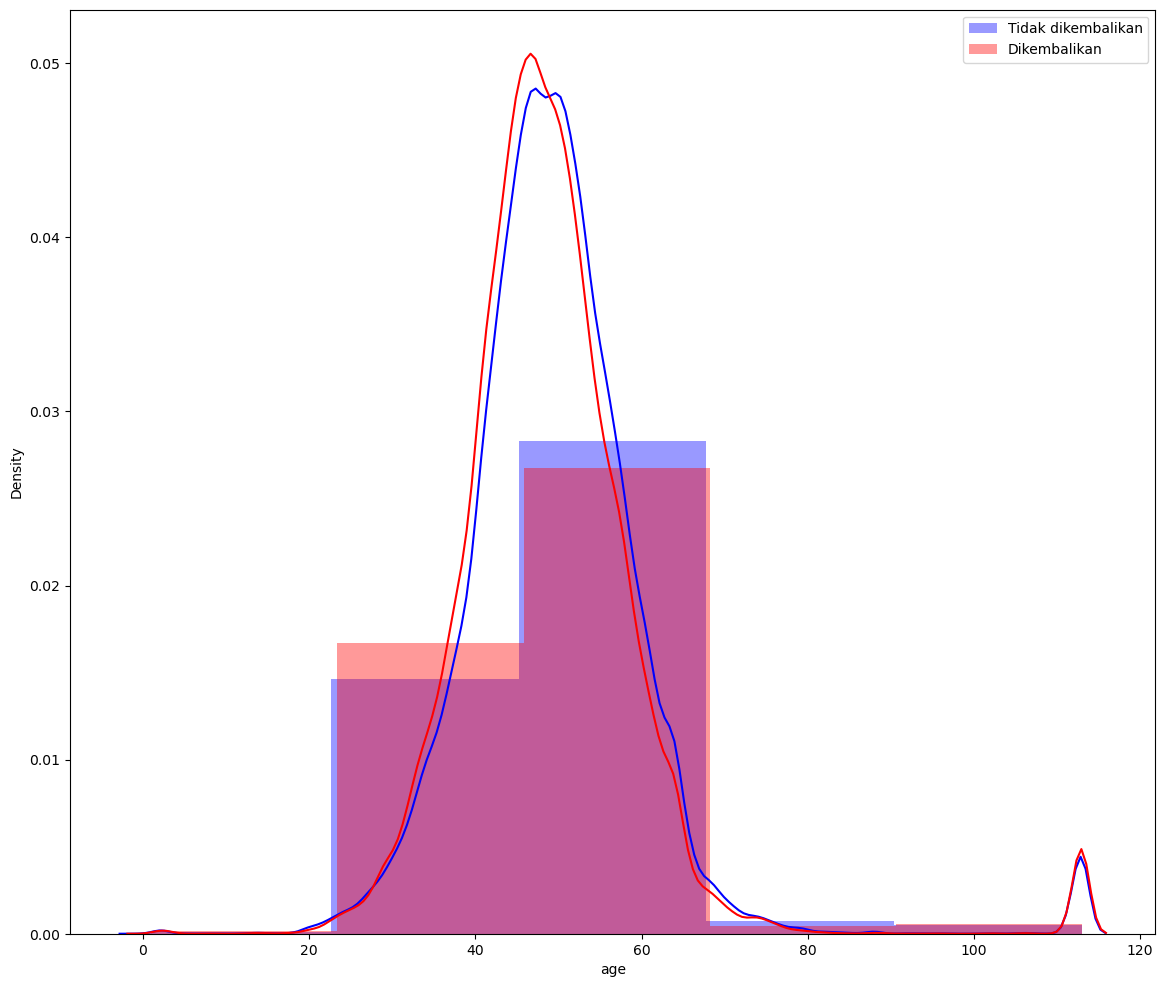

In [100]:
# age terhadap returnshipment
plt.figure(figsize=(14, 12))
sns.distplot(df_train.age[df_train.returnShipment == 0],bins=5, color = "b", label="Tidak dikembalikan")
sns.distplot(df_train.age[df_train.returnShipment == 1],bins=5, color = "r", label="Dikembalikan")
plt.legend();
# Berdasarkan analisis, customer umur 30-45 lebih banyak yang mengembalikan barang dan sekitar umur 110 juga
# sedangkan customer umur 46-80 serta umur 107 lebih banyak yang tidak mengembalikan barang

<AxesSubplot: xlabel='itemID', ylabel='Count'>

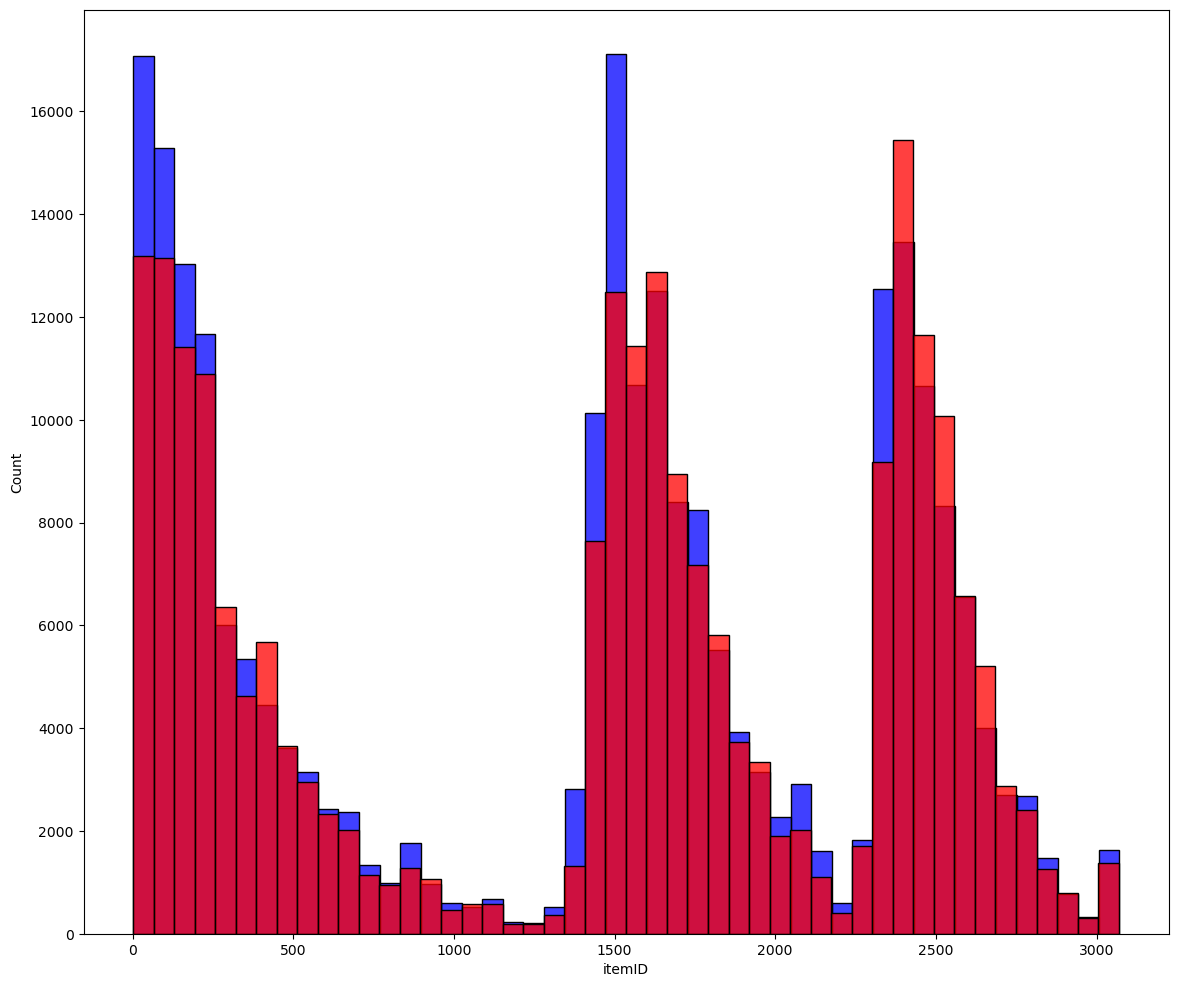

In [97]:
#  terhadap returnshipment
plt.figure(figsize=(14, 12))
sns.histplot(df_train.itemID[df_train.returnShipment == 0],color = "b", label="Tidak dikembalikan")
sns.histplot(df_train.itemID[df_train.returnShipment == 1],color = "r", label="Dikembalikan")
# berdasarkan analisis, lebih banyak itemID yang tidak dikembalikan daripada dikembalikan
# dapat dilihat dengan banyaknya batangan biru yang lebih tinggi dibanding batangan merah

### -----Categorical vs target (count/subplot)

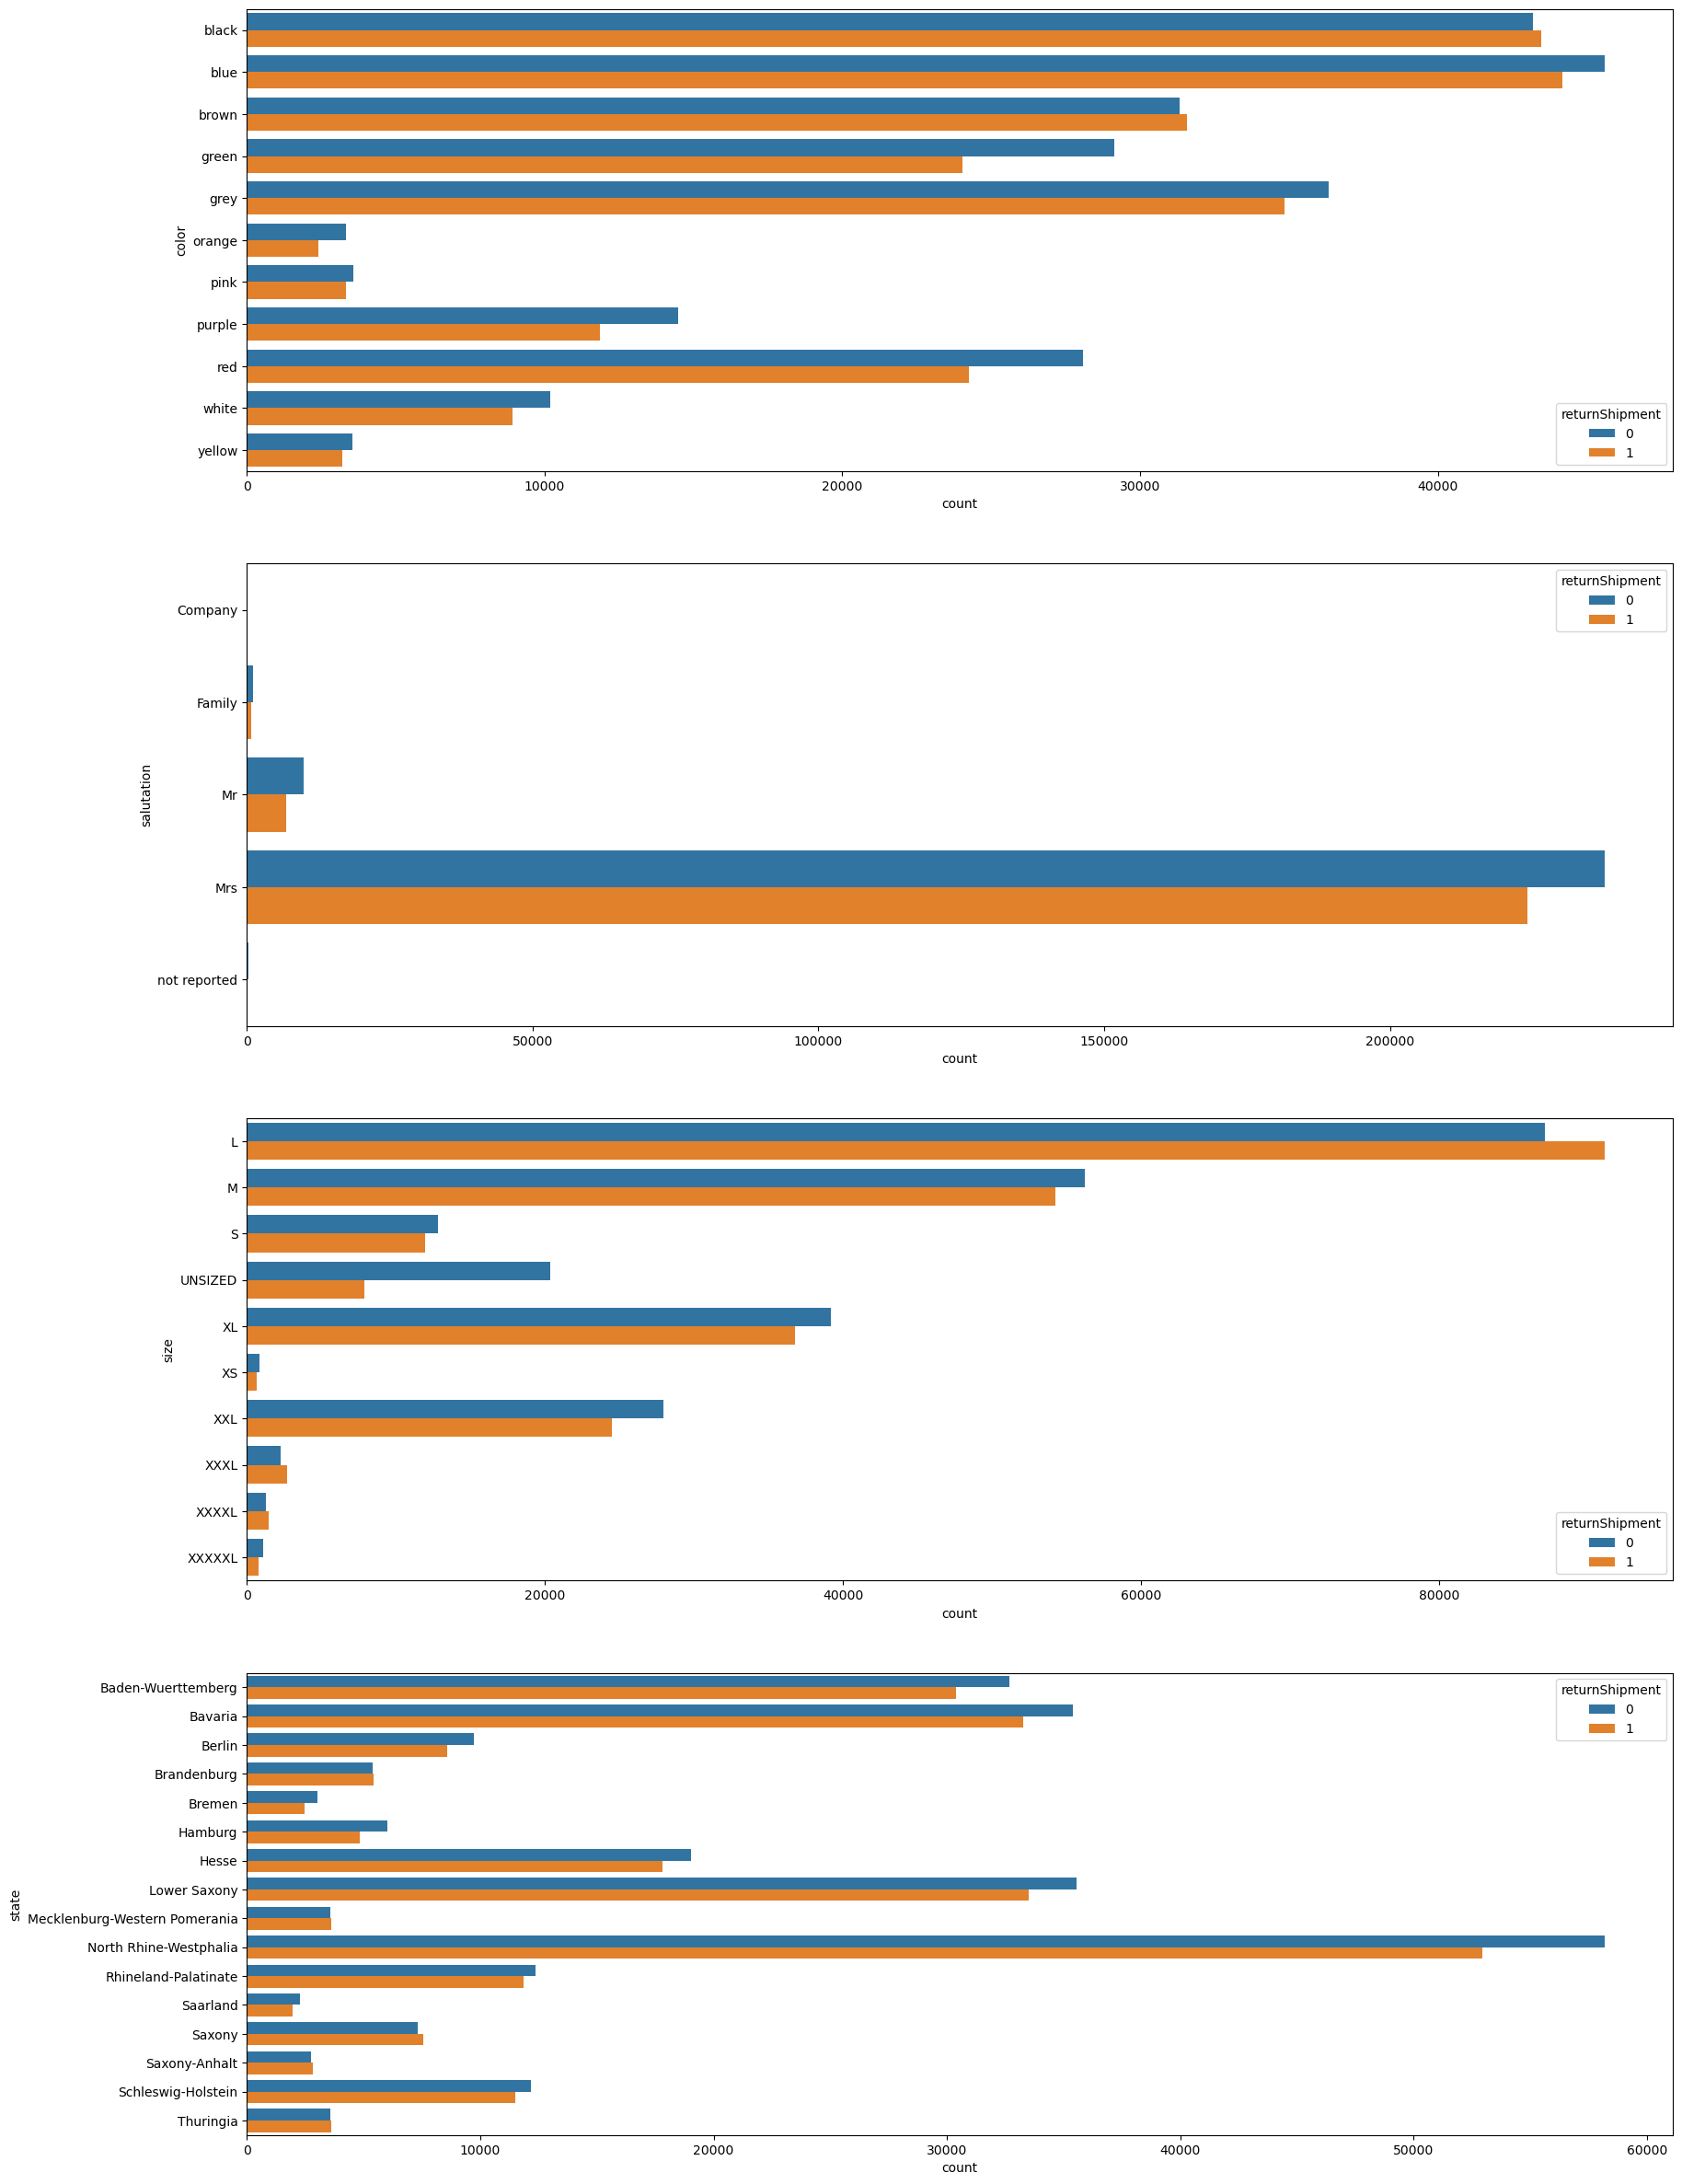

In [119]:
# bisa menggunakan subplot dimana menyatukan countplot jika kategori dalam suatu kolom tidak terlalu banyak
# countplot untuk menampilkan kolom kategorinya
# ===================================================================================================================
# df_train.info()
# -- MEMAKAI SUBPLOT
var_type = ["color", "salutation", "size", "state"]
fig, axes = plt.subplots(4, 1, figsize=(20,30))
for cat, ax in zip(var_type, axes.flatten()):
    sns.countplot(ax=ax, y=cat, hue="returnShipment", data=df_train, orient="v")
# ANALISIS
# untuk kolom color, color yang paling terlihat signifikan adalah green, purple, dan red, dimana ketiga warna ini lebih banyak
# yang tidak dikembalikan

# untuk kolom salutation juga sama, dimana untuk kategori Mr dan Mrs lebih banyak yang tidak dikembalikan

# untuk kolom size, ukuran UNSIZED terlihat signifikan lebih banyak dikembalikan asumsinya ukurannya tidak sesuai dengan yang
# customer harapkan karena ukurannya unsized. sedangkan ukuran L terlihat lebih banyak yang tidak dikembalikan

# untuk kolom state, dapat terlihat bahwa untuk setiap state itu lebih banyak yang tidak dikembalikan
# spesifiknya seperti salah satunya North Rhine-Westpalia, terlihat signifikan dari plotnya

In [121]:
# SELAIN DENGAN PLOT, UNTUK CATEGORY VS TARGET BISA MENGGUNAKAN PANDAS
pd.crosstab(df_train.state, df_train.returnShipment, normalize = "index")
# namun angka itu sulit dilihat

returnShipment,0,1
state,,
Baden-Wuerttemberg,0.518127,0.481873
Bavaria,0.515442,0.484558
Berlin,0.530849,0.469151
Brandenburg,0.498145,0.501855
Bremen,0.551768,0.448232
Hamburg,0.555801,0.444199
Hesse,0.516443,0.483557
Lower Saxony,0.514997,0.485003
Mecklenburg-Western Pomerania,0.496582,0.503418


## -----BINNING (ONE HOT ENCODING UNTUK TIPE DATA NUMERIK)

In [ ]:
# MENGISI MISSING VALUE DENGAN MEAN
# df_train['col'].fillna(value=df_train['col'].mean(), inplace=True)

In [ ]:
# MELIHAT PERSENTASE MISSING VALUE
# df_train.isnull().sum()/len(df_train)*100

In [123]:
# STATISTIK SUMMARY
# df_train.corr()
# df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
itemID,481089.0,1399.761549,931.076794,1.0,332.0,1569.0,2342.0,3071.0
manufacturerID,481089.0,29.726121,30.065013,1.0,5.0,21.0,43.0,166.0
price,481089.0,70.440025,45.502916,0.0,34.9,59.9,89.9,999.0
customerID,481089.0,33369.874221,23972.120349,6.0,12891.0,28426.0,51141.0,86611.0
returnShipment,481089.0,0.482424,0.499692,0.0,0.0,0.0,1.0,1.0
age,432200.0,49.218087,11.065629,0.0,43.0,48.0,54.0,113.0
delivery_time,437010.0,10.718203,17.951592,0.0,2.0,3.0,8.0,175.0
accountAge,481089.0,733.373611,264.927326,275.0,513.0,686.0,1049.0,1049.0
orderYear,481089.0,2012.344159,0.475094,2012.0,2012.0,2012.0,2013.0,2013.0
orderMonth,481089.0,5.739728,3.351970,1.0,3.0,5.0,9.0,12.0


## Visualisasi Data

### Heatmap ReturnShipment
heatmap dibawah ini menjelaskan hubungan dari berbagai column numerik yang ada terhadap column "returnShipment" dari gambar tersebut didapatkan bahwa price memiliki korelasi terbesar terhadap returnShipment, namun column lain memiliki korelasi yang sangat kecil bahkan negatif.

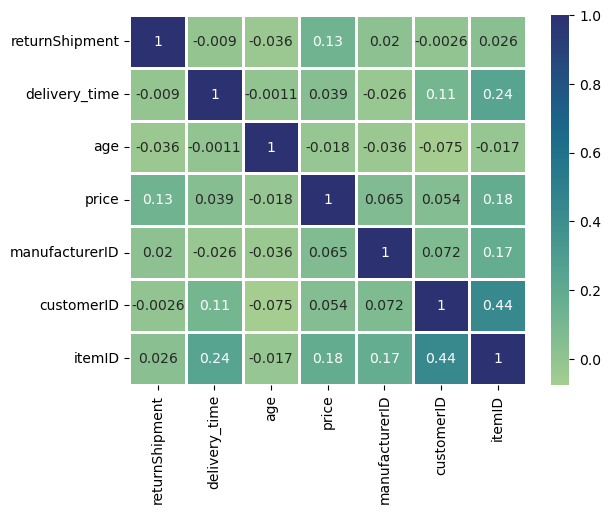

In [37]:
corr = df_train[["returnShipment","delivery_time","age", "price","manufacturerID", "customerID", "itemID"]].corr()
ax = sns.heatmap(corr, annot=True, linewidth=.8, cmap="crest")

### Countplot Jumlah returnShipment di setiap State
Di Countplot dibawah ini menunjukan jumlah returnShipment dari setiap state. dari plot ini juga dapat dilihat state yg memiliki jumlah transaksi terbesar. North Rhine Westphalia meiliki transaksi terbanyak dan para pembeli yang melakukan returnShipment lebih sedikit dari yang tidak melakukannya.

<AxesSubplot: xlabel='count', ylabel='state'>

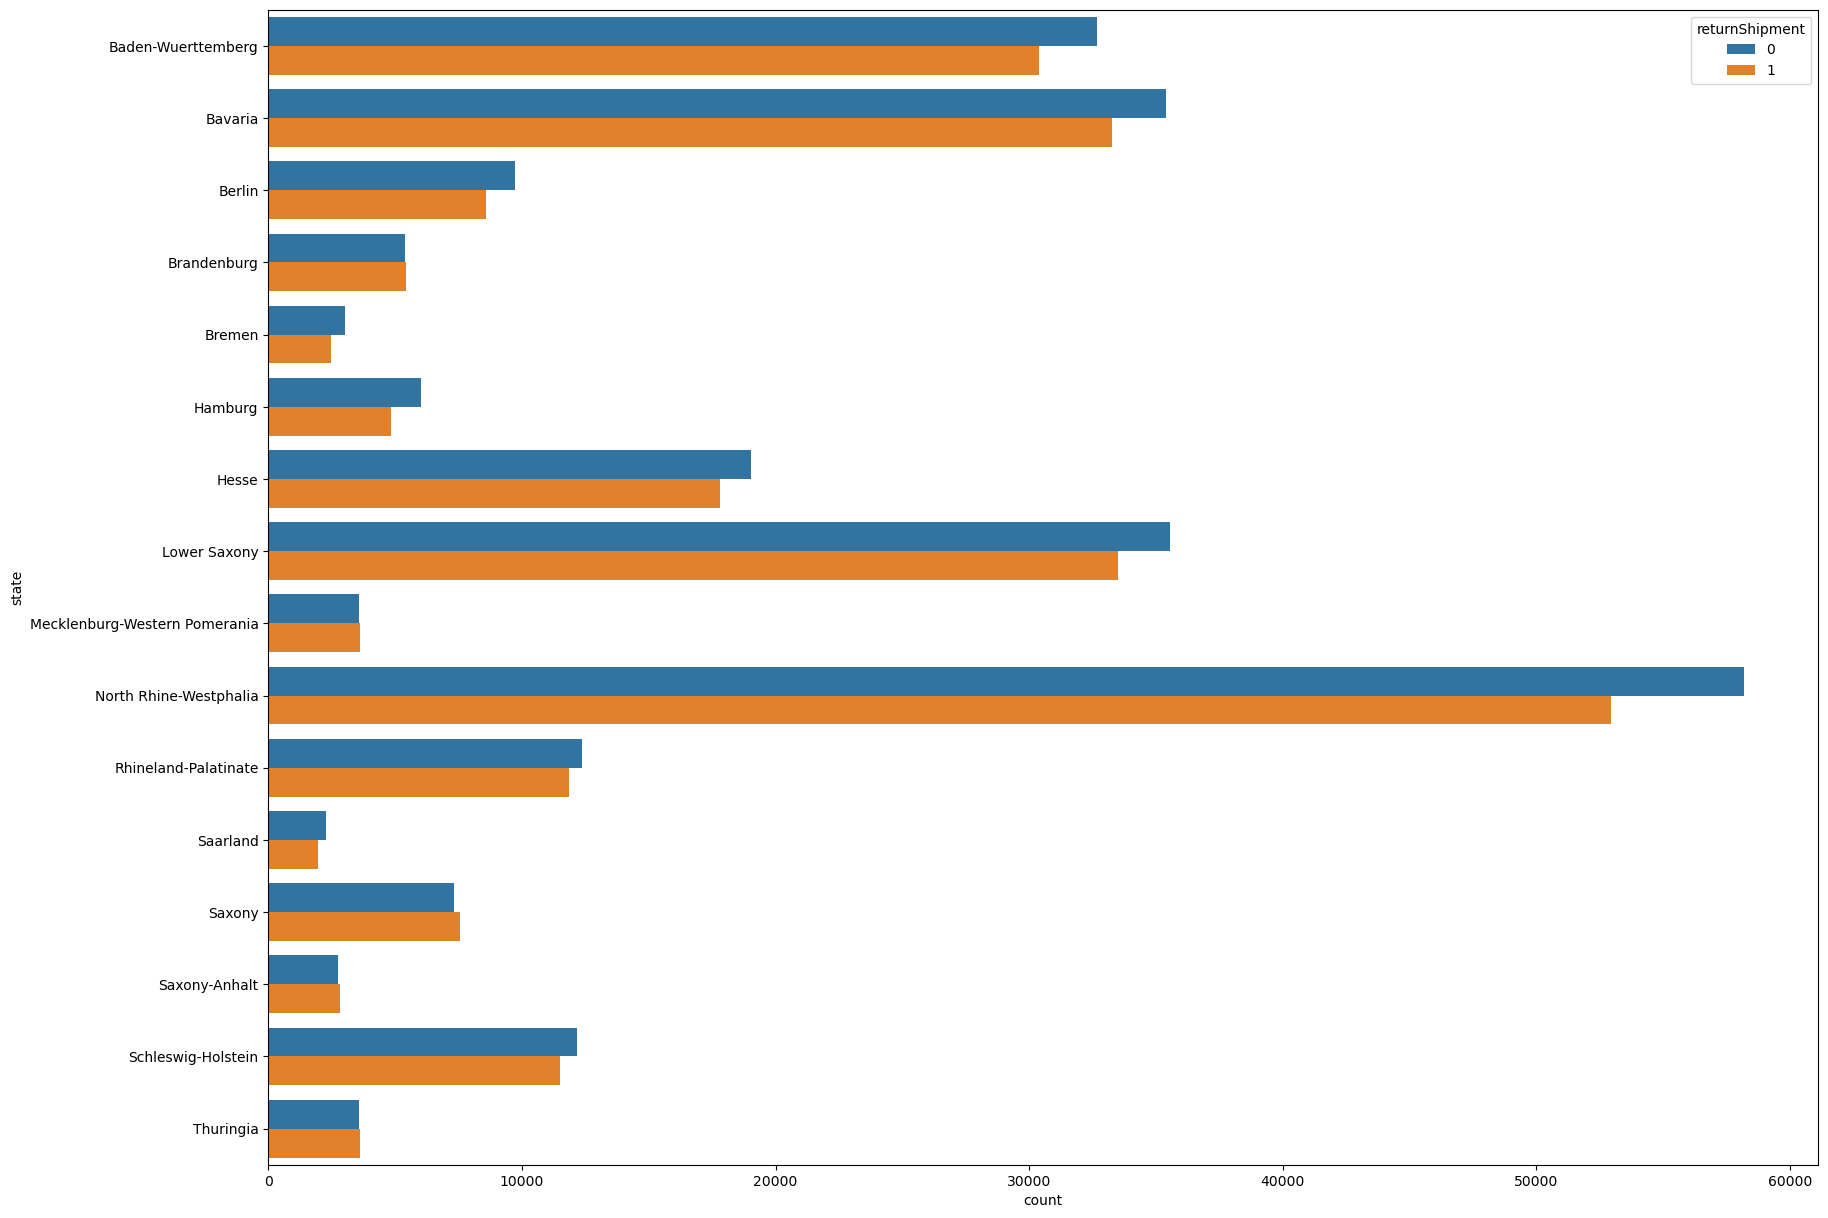

In [38]:
fig, ax = plt.subplots(figsize=(20, 15)) #atur ukuran chart
sns.countplot(ax=ax, y="state", hue="returnShipment", data=df_train, orient="v" )

### Barplot Price & Size terhadap returnShipment
Barplot dibawah ini menunjukan hubungan price dan size terhadap returnShipment. Dilihat dari plot ini barang yang lebih banyak di returnShipment memiliki harga yang lebih tinggi, lalu size barang yang paling banyak di return yakni size L.

<AxesSubplot: xlabel='price', ylabel='size'>

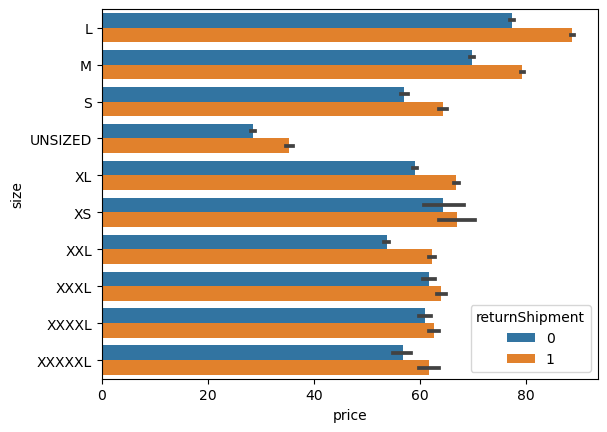

In [39]:
sns.barplot(x='price', y='size', hue ='returnShipment',orient = "h", data = df_train)

### Boxplot
Boxplot dibawah ini untuk melihat outlier serta beberapa hubungan atribut dengan atribut prediksinya yaitu atribut returnShipment 

#### Boxplot Price dengan returnShipment
Pada grafik di bawah, atribut returnShipment dan atribut price memiliki outlier atas yang cukup banyak dari nilai maksimum ataupun rata-rata data dan juga terdapat nilai extreme. Outlier atas pada atribut returnShipment lebih mendominasi dibandingkan atribut price, namun outlier kedua data tersebut memiliki variasi data yang serupa.

<AxesSubplot: xlabel='returnShipment', ylabel='price'>

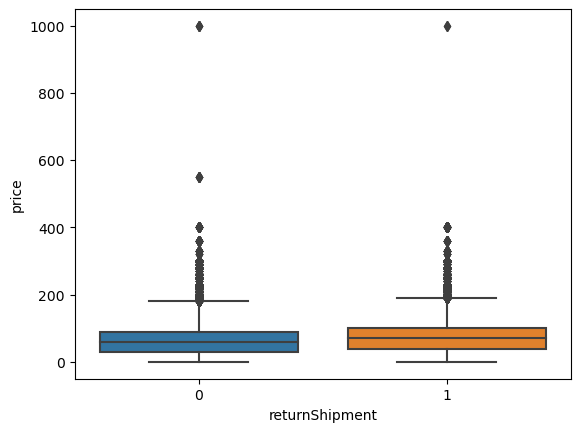

In [40]:
# Boxplot
sns.boxplot(x=df_train["returnShipment"], y=df_train["price"])

In [41]:
# melihat data yang extreme
df_train[df_train.price > 800]['returnShipment'].value_counts()

0    4
1    2
Name: returnShipment, dtype: int64

#### Boxplot delivery_time dengan returnShipment
Pada grafik di bawah, terdapat outlier atas yang tinggi pada atribut returnShipment dan atribut delivery_time. Pada outiler tersebut juga termasuk nilai extreme di dalamnya.
Dapat dilihat bahwa nilai outlier kedua data tersebut cukup jauh dari nilai rata-rata nya. Variasi data pada outlier tersebut juga sangat serupa dari data yang satu ke data yang
lainnya sehingga dapat dilihat minim jarak bahkan tidak ada antara nilai outlier.

<AxesSubplot: xlabel='returnShipment', ylabel='delivery_time'>

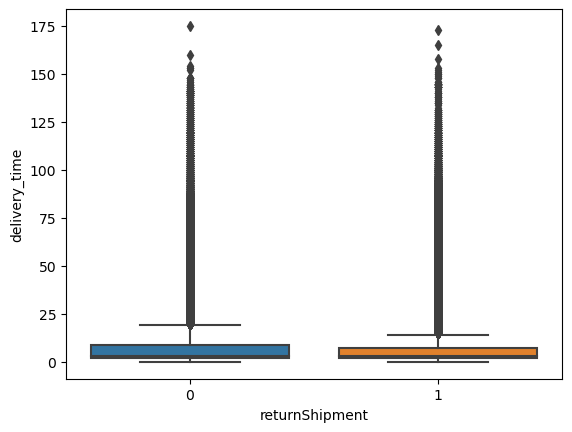

In [42]:
# Boxplot
sns.boxplot(x=df_train["returnShipment"], y=df_train["delivery_time"])

#### melihat data yang extreme

In [43]:
# melihat jumlah data yang atribut delivery_time > 25
df_train[df_train.delivery_time > 25]['returnShipment'].value_counts()

1    30734
0    28788
Name: returnShipment, dtype: int64

In [44]:
# melihat jumlah data yang atribut delivery_time > 100
df_train[df_train.delivery_time > 100]['returnShipment'].value_counts()

0    760
1    721
Name: returnShipment, dtype: int64

In [45]:
# melihat jumlah data yang atribut delivery_time > 150
df_train[df_train.delivery_time > 150]['returnShipment'].value_counts()

0    6
1    6
Name: returnShipment, dtype: int64

#### Boxplot age dengan returnShipment
Pada grafik di bawah, terdapat outlier atas dan outlier bawah pada atribut returnShipment dan atribut age. Terlihat outlier pada atribut returnShipment dan atribut age memiliki banyak data extreme. Data extreme pada atribut age lebih didominasi oleh data-data yang serupa, dan nilai rata-rata atribut age pun lebih didominasi oleh nilai quartil pertama.

<AxesSubplot: xlabel='returnShipment', ylabel='age'>

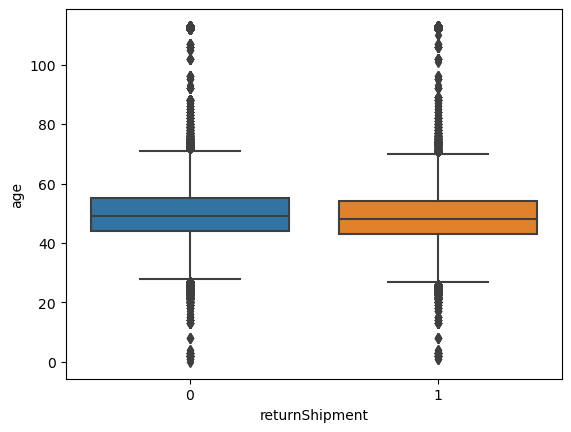

In [46]:
# Boxplot
sns.boxplot(x=df_train["returnShipment"], y=df_train["age"])

In [47]:
# melihat jumlah data yang atribut umurnya < 20
df_train[df_train.age < 20]['returnShipment'].value_counts()

0    184
1    163
Name: returnShipment, dtype: int64

In [48]:
# melihat jumlah data yang atribut umurnya < 10
df_train[df_train.age < 10]['returnShipment'].value_counts()

0    117
1    110
Name: returnShipment, dtype: int64

In [49]:
# melihat data yang atribut agenya < 10
df_train[df_train.age < 10]

,itemID,size,color,manufacturerID,price,customerID,salutation,state,returnShipment,age,delivery_time,accountAge,orderYear,orderMonth
6495,199,L,white,4,69.95,3941,Mrs,Lower Saxony,0,3.0,3.0,1049,2012,4
6496,62,UNSIZED,green,5,14.90,3941,Mrs,Lower Saxony,0,3.0,74.0,1049,2012,4
6497,158,M,green,54,59.90,3941,Mrs,Lower Saxony,1,3.0,74.0,1049,2012,4
20584,96,XXL,blue,3,16.90,9222,Mrs,Bavaria,0,2.0,4.0,953,2012,4
20585,96,XXL,green,3,16.90,9222,Mrs,Bavaria,0,2.0,4.0,953,2012,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440654,2382,M,brown,3,49.90,49402,Mrs,Lower Saxony,1,2.0,2.0,296,2013,3
464390,2869,XL,black,1,149.90,84668,Mrs,Baden-Wuerttemberg,0,1.0,NaN,284,2013,3
464391,2552,S,blue,19,89.90,84668,Mrs,Baden-Wuerttemberg,0,1.0,NaN,284,2013,3
465941,2552,M,blue,19,89.90,84668,Mrs,Baden-Wuerttemberg,1,1.0,9.0,284,2013,3


In [50]:
# melihat jumlah data yang atribut umurnya > 80
df_train[df_train.age > 80]['returnShipment'].value_counts()

0    2752
1    2739
Name: returnShipment, dtype: int64

In [51]:
# melihat jumlah data yang atribut umurnya > 100
df_train[df_train.age > 100]['returnShipment'].value_counts()

1    2640
0    2569
Name: returnShipment, dtype: int64

In [52]:
# melihat jumlah data yang atribut umurnya > 120
df_train[df_train.age > 120]['returnShipment'].value_counts()

Series([], Name: returnShipment, dtype: int64)

### Export

In [53]:
# df_train.to_csv('praproses_data_training.csv', index = False)